# ARN - Practical Work 3 - Mice's sleep stages classification with MLP
Students :
- Baquerizo Emily
- Dousse Rafael

## Exercice 1

In [1]:
#importation of library
import pandas as pd
import numpy as np
import matplotlib.pyplot as pl
import keras
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from keras import layers
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from keras.utils import to_categorical

2024-04-21 10:04:26.538438: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-21 10:04:26.546335: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-21 10:04:26.645633: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-21 10:04:28.632986: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
mice_eeg_1 = pd.read_csv('pw3_data/EEG_mouse_data_1.csv')

mice_egg_2 = pd.read_csv('pw3_data/EEG_mouse_data_2.csv')

mice_eeg_total = pd.concat([mice_eeg_1, mice_egg_2])

In [5]:
data_train_1 = mice_eeg_total.iloc[:, :26]
#data_train_1

In [6]:
# data_train preparation
data_train_1["state"][data_train_1["state"] == "w"] = -1
data_train_1["state"][data_train_1["state"] != -1] = 1
#data_train_1["state"]

# data normalization
scaler = StandardScaler()
data_train_normalized_1 = scaler.fit_transform(data_train_1.iloc[:,1:])
#data_train_normalized_1.shape


/tmp/ipykernel_17274/1975280662.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train_1["state"][data_train_1["state"] == "w"] = -1
/tmp/ipykernel_17274/1975280662.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train_1["state"][data_train_1["state"] != -1] = 1


In [5]:
# %pip install keras
# %pip install tensorflow

In [92]:
def create_model_1():

  mlp = keras.Sequential([
      layers.Input((25,)),
      layers.Dense(4, activation="tanh"), # Try different numbers of hidden neurons here (e.g. 2, 4, 8, 32, 128)
      layers.Dense(1, activation="tanh"),
  ])

  # Experiment with hyperparameters here:
  # momentum: [0, 0.8, 0.9, 0.99]
  # learning_rate: [0.1, 0.01, 0.001, 0.0001]
  mlp.compile(
      optimizer=keras.optimizers.SGD(learning_rate=0.01, momentum=0.99),  #0.01
      loss="mse",
  )

  return mlp

mlp = create_model_1()
mlp.summary()

Model: "sequential_49"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_107 (Dense)               │ (None, 4)              │           104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_108 (Dense)               │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109 (436.00 B)

 Trainable params: 109 (436.00 B)

 Non-trainable params: 0 (0.00 B)

In [96]:
keras.utils.set_random_seed(123)
kf = KFold(n_splits=3, shuffle=True) 

def model_train_1(fctn_model, input_data ,output_data):
    history_list = []
    trained_mlp = []
    cm_list = []

    for i,(train_index, test_index) in enumerate(kf.split(data_train_normalized_1)) :
        mlp = fctn_model()
        history = mlp.fit(
            x = np.float32(input_data)[train_index],
            y = np.float32(output_data.to_numpy())[train_index],
            validation_data = (np.float32(input_data)[test_index], np.float32(output_data.to_numpy())[test_index]),
            epochs = 50
        )

        cm = confusion_matrix(np.float32(output_data.to_numpy())[test_index] > 0, mlp(np.float32(input_data)[test_index]) > 0)

        history_list.append(history)
        trained_mlp.append(mlp)
        cm_list.append(cm)

    return history_list, trained_mlp, train_index, test_index, cm_list

In [97]:
input_data_1 = data_train_normalized_1
output_data_1 = data_train_1['state']

history_list_1, trained_mlp_1, train_index_1, test_index_1, cm_list_1 = model_train_1(create_model_1, input_data_1, output_data_1)

Epoch 1/50
852/852 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.5247 - val_loss: 0.3946
Epoch 2/50
852/852 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.3866 - val_loss: 0.3842
Epoch 3/50
852/852 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3830 - val_loss: 0.3872
Epoch 4/50
852/852 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3811 - val_loss: 0.4301
Epoch 5/50
852/852 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3837 - val_loss: 0.4281
Epoch 6/50
852/852 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3848 - val_loss: 0.3966
Epoch 7/50
852/852 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3676 - val_loss: 0.4294
Epoch 8/50
852/852 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3700 - val_loss: 0.3784
Epoch 9/50
852/852 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.3633 - val_loss: 0.4216
Epoch 10/50
852/852 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3976 - val_loss: 0.3957
Epoch 11/50
852/852 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3801 - val_loss: 0.3665
Epoch 12/50
852/852 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step

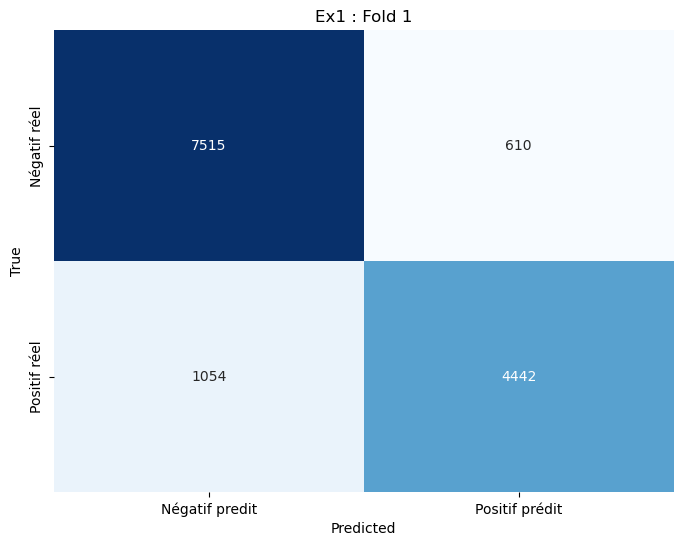

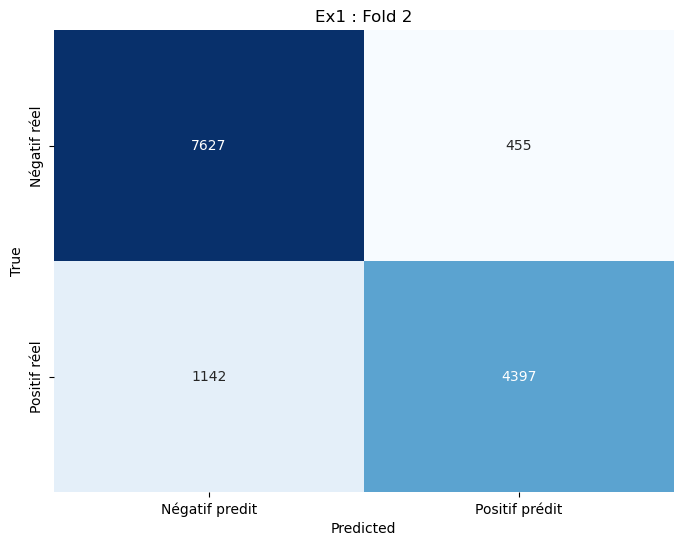

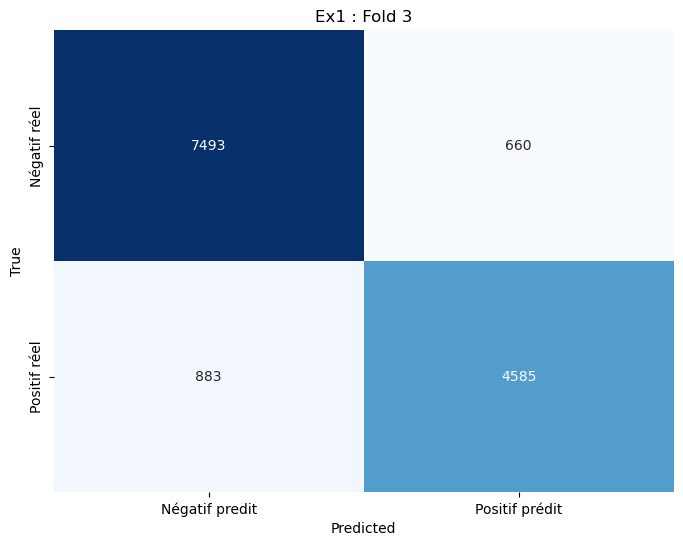

In [98]:
# Plot confusion matrix
def plot_confusion_matrix_1(confusion_matrix, title):
    pl.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix.astype(int), annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=["Négatif predit", "Positif prédit"], yticklabels=["Négatif réel", "Positif réel"])
    pl.title(title)
    pl.xlabel('Predicted')
    pl.ylabel('True')
    pl.show()


for i, cm in enumerate(cm_list_1):
    plot_confusion_matrix_1(cm, title=f"Ex1 : Fold {i+1}")

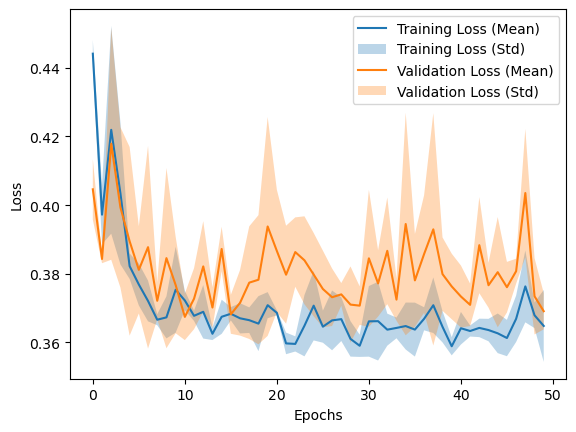

In [99]:
def plot_history(history_l) :
    train_losses = np.array([history.history['loss'] for history in history_l])
    val_losses = np.array([history.history['val_loss'] for history in history_l])

    # Calculate mean and standard deviation for training and validation losses
    mean_train_loss = np.mean(train_losses, axis=0)
    std_train_loss = np.std(train_losses, axis=0)
    mean_val_loss = np.mean(val_losses, axis=0)
    std_val_loss = np.std(val_losses, axis=0)

    # Plot mean and standard deviation for training loss
    pl.plot(mean_train_loss, label='Training Loss (Mean)')
    pl.fill_between(range(len(mean_train_loss)), mean_train_loss - std_train_loss, mean_train_loss + std_train_loss, alpha=0.3, label='Training Loss (Std)')

    # Plot mean and standard deviation for validation loss
    pl.plot(mean_val_loss, label='Validation Loss (Mean)')
    pl.fill_between(range(len(mean_val_loss)), mean_val_loss - std_val_loss, mean_val_loss + std_val_loss, alpha=0.3, label='Validation Loss (Std)')

    # Add labels and legend
    pl.xlabel('Epochs')
    pl.ylabel('Loss')
    pl.legend()

    # Display the plot
    pl.show()

plot_history(history_list_1)

In [100]:
#f1 score mean
f1_scores_1 = []

for i, mlp in enumerate(trained_mlp_1):
    y_pred = np.round(mlp.predict(np.float32(input_data_1)[test_index_1]) > 0)
    f1 = f1_score(np.float32(output_data_1.to_numpy())[test_index_1] > 0, y_pred)
    f1_scores_1.append(f1)

f1_mean_1 = np.mean(f1_scores_1)

for i, f1 in enumerate(f1_scores_1):
    print(f"Fold {i+1}, F1 Score: {f1}")

print(f"\nMean F1 Score: {f1_mean_1}")

426/426 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
426/426 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
426/426 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Fold 1, F1 Score: 0.8523655709671291
Fold 2, F1 Score: 0.8569766314360515
Fold 3, F1 Score: 0.8559693829926258

Mean F1 Score: 0.8551038617986021


## Exercice 2

In [101]:
data_train_2 = mice_eeg_total.iloc[:, :26]
#data_train_2

data_train_2["state"][data_train_2["state"] == "n"] = 0
data_train_2["state"][data_train_2["state"] == "r"] = 1
data_train_2["state"][data_train_2["state"] == "w"] = 2

data_train_2["state"]

# data normalization
scaler_2 = StandardScaler()
data_train_normalized_2 = scaler_2.fit_transform(data_train_2.iloc[:,1:])
data_train_normalized_2.shape

/tmp/ipykernel_17274/283034511.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train_2["state"][data_train_2["state"] == "n"] = 0
/tmp/ipykernel_17274/283034511.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train_2["state"][data_train_2["state"] == "r"] = 1
/tmp/ipykernel_17274/283034511.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train_2["state"][data_train_2["state"] == "w"] = 2


(40863, 25)

In [102]:
def create_model_2():

  mlp = keras.Sequential([
      layers.Input((25,)),
      layers.Dense(8, activation="sigmoid"), # Try different numbers of hidden neurons here (e.g. 2, 4, 8, 32, 128)
      layers.Dense(3, activation="softmax"), # softmax because we have 3 classes
  ])

  # Experiment with hyperparameters here:
  # momentum: [0, 0.8, 0.9, 0.99]
  # learning_rate: [0.1, 0.01, 0.001, 0.0001]
  mlp.compile(
      optimizer=keras.optimizers.SGD(learning_rate=0.01, momentum=0.99),  #0.01
      loss="mse",
  )

  return mlp

mlp_2 = create_model_2()
mlp_2.summary()

Model: "sequential_56"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_121 (Dense)               │ (None, 8)              │           208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_122 (Dense)               │ (None, 3)              │            27 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235 (940.00 B)

 Trainable params: 235 (940.00 B)

 Non-trainable params: 0 (0.00 B)

In [103]:
keras.utils.set_random_seed(123)
kf = KFold(n_splits=3, shuffle=True)

def model_train_2(fctn_model, input_data ,output_data):
    history_list = []
    trained_mlp = []
    cm_list = []

    for i,(train_index, test_index) in enumerate(kf.split(data_train_normalized_2)) :
        mlp_2 = fctn_model()
        history = mlp_2.fit(
            x = np.float32(input_data)[train_index],
            y = np.float32(output_data)[train_index],
            validation_data = (np.float32(input_data)[test_index], np.float32(output_data)[test_index]),
            epochs = 50
        )
        #cm = confusion_matrix(np.float32(output_data)[test_index], np.round(mlp.predict(np.float32(input_data)[test_index])))
    
        history_list.append(history)
        trained_mlp.append(mlp_2)
        #cm_list.append(cm)
    #for i, mlp in enumerate(trained_mlp):
        #y_pred = mlp.predict(np.float32(input_data)[test_index])
        #y_pred = np.round(y_pred)
        #y_pred = y_pred.argmax(axis=1)
        #print(y_pred)
        #np.round(mlp.predict(np.float32(input_data)[test_index]))
        #cm = confusion_matrix(output_data[test_index], np.round(mlp.predict(np.float32(input_data)[test_index])))
        #cm_list.append(cm)
        
    return history_list, trained_mlp, train_index, test_index, cm_list

In [104]:
input_data_2 = data_train_normalized_2
output_data_2 = to_categorical(data_train_2["state"])

history_list_2, trained_mlp_2, train_index_2, test_index_2, cm_list_2 = model_train_2(create_model_2, input_data_2, output_data_2)

Epoch 1/50
852/852 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1055 - val_loss: 0.0674
Epoch 2/50
852/852 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0643 - val_loss: 0.0657
Epoch 3/50
852/852 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0627 - val_loss: 0.0651
Epoch 4/50
852/852 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0621 - val_loss: 0.0646
Epoch 5/50
852/852 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0616 - val_loss: 0.0642
Epoch 6/50
852/852 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0611 - val_loss: 0.0638
Epoch 7/50
852/852 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0607 - val_loss: 0.0636
Epoch 8/50
852/852 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0604 - val_loss: 0.0634
Epoch 9/50
852/852 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0602 - val_loss: 0.0633
Epoch 10/50
852/852 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0601 - val_loss: 0.0632
Epoch 11/50
852/852 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0599 - val_loss: 0.0631
Epoch 12/50
852/852 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step

426/426 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[0 0 2 ... 0 2 0]
426/426 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
[0 0 0 ... 0 2 0]
426/426 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[0 0 2 ... 0 2 0]


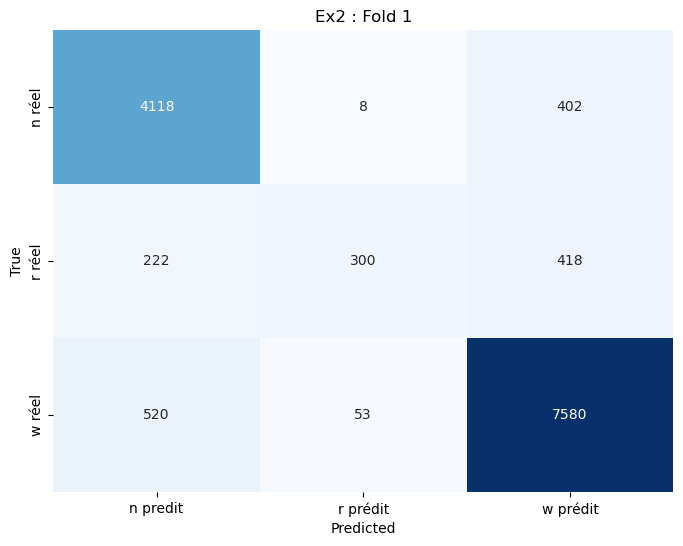

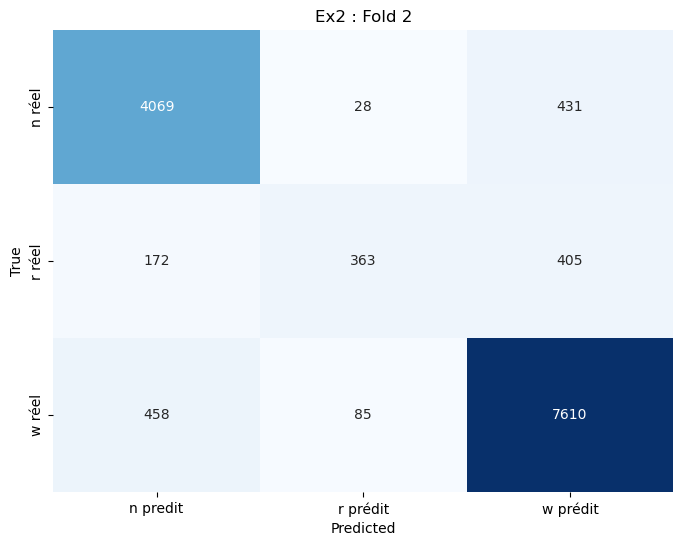

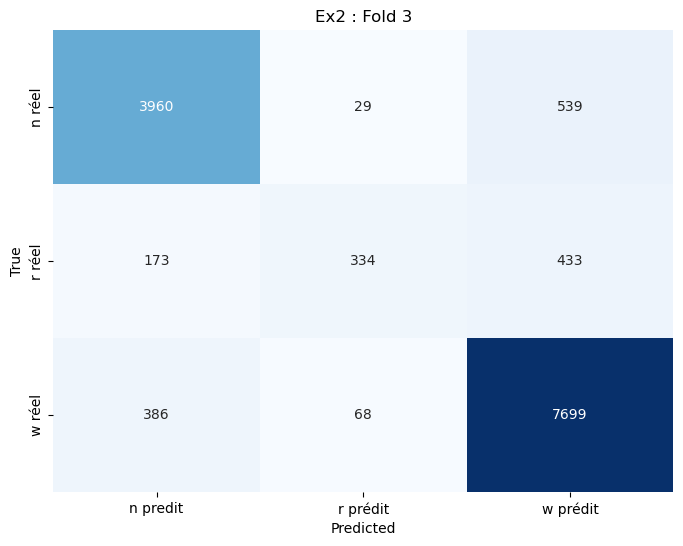

In [105]:
def plot_confusion_matrix_2(confusion_matrix, title):
    pl.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix.astype(int), annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=["n predit", "r prédit", "w prédit"], yticklabels=["n réel", "r réel", "w réel"])
    pl.title(title)
    pl.xlabel('Predicted')
    pl.ylabel('True')
    pl.show()

cm_list_2 = []

for i, mlp in enumerate(trained_mlp_2):
    y_pred = mlp.predict(input_data_2[test_index_2])
    y_pred = np.round(y_pred)
    y_pred = y_pred.argmax(axis=1)
    y_true = np.argmax(output_data_2[test_index_2], axis=1)
    #y_pred = to_categorical(y_pred, num_classes=3)
    print(y_pred)
    cm = confusion_matrix(y_true, y_pred)
    cm_list_2.append(cm)

for i, cm in enumerate(cm_list_2):
    plot_confusion_matrix_2(cm, title=f"Ex2 : Fold {i+1}")

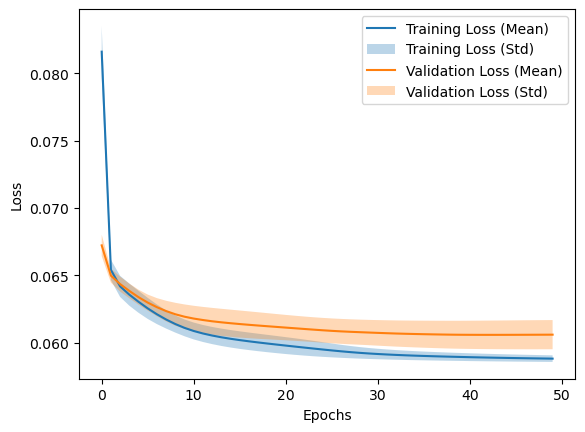

In [106]:
plot_history(history_list_2)

In [107]:
#f1 score mean
f1_scores_2 = []

for i, mlp in enumerate(trained_mlp_2):
    y_pred = np.round(mlp.predict(np.float32(input_data_2)[test_index_2]))
    f1 = f1_score(np.float32(output_data_2)[test_index_2], y_pred, average='micro')
    f1_scores_2.append(f1)

f1_mean_2 = np.mean(f1_scores_2)

for i, f1 in enumerate(f1_scores_2):
    print(f"Fold {i+1}, F1 Score: {f1}")

print(f"\nMean F1 Score: {f1_mean_2}")

426/426 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
426/426 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
426/426 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Fold 1, F1 Score: 0.8842315369261478
Fold 2, F1 Score: 0.8870234088975999
Fold 3, F1 Score: 0.8834215102297532

Mean F1 Score: 0.8848921520178337


## Competition


In [59]:
data_train_3 = mice_eeg_total.iloc[:, :26]
#data_train_3

data_test = pd.read_csv('pw3_data/EEG_mouse_data_test.csv')

In [60]:
# data_train preparation
data_train_3["state"][data_train_3["state"] == "w"] = -1
data_train_3["state"][data_train_3["state"] != -1] = 1
#data_train_3["state"]

# data normalization
scaler = StandardScaler()
data_train_normalized_3 = scaler.fit_transform(data_train_3.iloc[:,1:])
#data_train_normalized_3.shape

data_test_normalized = scaler.transform(data_test.iloc[:,:25])
data_test_normalized.shape

/tmp/ipykernel_17274/1689317484.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train_3["state"][data_train_3["state"] == "w"] = -1
/tmp/ipykernel_17274/1689317484.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train_3["state"][data_train_3["state"] != -1] = 1


(80109, 25)

In [61]:
def create_model_3():

  mlp = keras.Sequential([
      layers.Input((25,)),
      layers.Dense(3, activation="tanh"), # Try different numbers of hidden neurons here (e.g. 2, 4, 8, 32, 128)
      layers.Dense(3, activation = "tanh"), # new hidden layer
      layers.Dense(1, activation="tanh"),
  ])

  # Experiment with hyperparameters here:
  # momentum: [0, 0.8, 0.9, 0.99]
  # learning_rate: [0.1, 0.01, 0.001, 0.0001]
  mlp.compile(
      optimizer=keras.optimizers.SGD(learning_rate=0.1, momentum=0.001),  #0.01
      loss="mse",
  )

  return mlp

mlp_3 = create_model_3()
mlp_3.summary()

Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_49 (Dense)                │ (None, 3)              │            78 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ (None, 3)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_51 (Dense)                │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 94 (376.00 B)

 Trainable params: 94 (376.00 B)

 Non-trainable params: 0 (0.00 B)

In [62]:
keras.utils.set_random_seed(123)
kf = KFold(n_splits=3, shuffle=True) 

def model_train_3(fctn_model, input_data ,output_data):
    history_list = []
    trained_mlp = []
    cm_list = []

    for i,(train_index, test_index) in enumerate(kf.split(data_train_normalized_3)) :
        mlp = fctn_model()
        history = mlp.fit(
            x = np.float32(input_data)[train_index],
            y = np.float32(output_data.to_numpy())[train_index],
            validation_data = (np.float32(input_data)[test_index], np.float32(output_data.to_numpy())[test_index]),
            epochs = 20
        )

        cm = confusion_matrix(np.float32(output_data.to_numpy())[test_index] > 0, mlp(np.float32(input_data)[test_index]) > 0)

        history_list.append(history)
        trained_mlp.append(mlp)
        cm_list.append(cm)

    return history_list, trained_mlp, train_index, test_index, cm_list

In [63]:
input_data_3 = data_train_normalized_3
output_data_3 = data_train_3['state']

history_list_3, trained_mlp_3, train_index_3, test_index_3, cm_list_3 = model_train_3(create_model_3, input_data_3, output_data_3)

Epoch 1/20
852/852 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.4168 - val_loss: 0.3647
Epoch 2/20
852/852 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.3527 - val_loss: 0.3594
Epoch 3/20
852/852 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3494 - val_loss: 0.3590
Epoch 4/20
852/852 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3467 - val_loss: 0.3610
Epoch 5/20
852/852 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3450 - val_loss: 0.3594
Epoch 6/20
852/852 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3440 - val_loss: 0.3573
Epoch 7/20
852/852 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3434 - val_loss: 0.3556
Epoch 8/20
 35/852 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3118  

KeyboardInterrupt: 

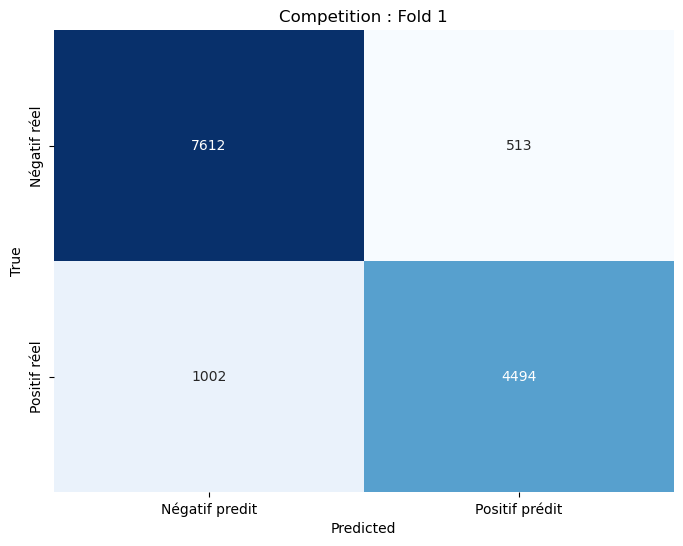

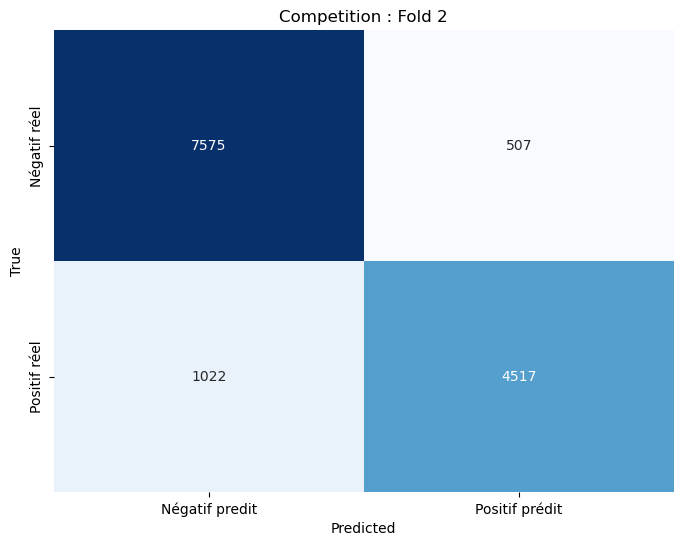

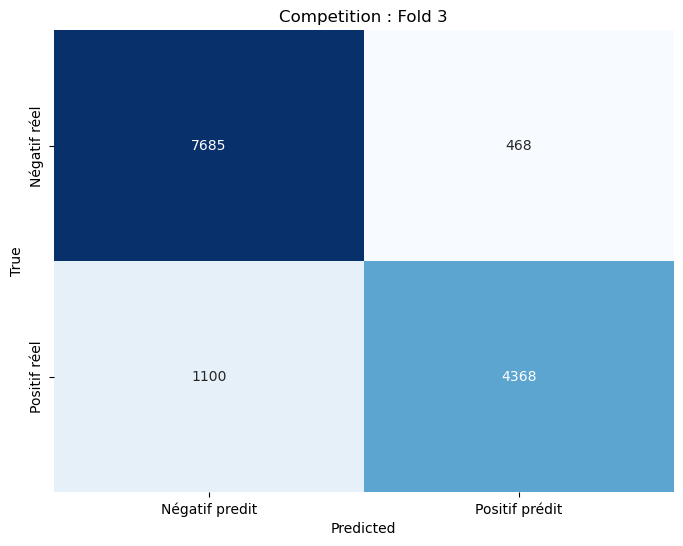

In [ ]:
# Plot confusion matrix
def plot_confusion_matrix_3(confusion_matrix, title):
    pl.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix.astype(int), annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=["Négatif predit", "Positif prédit"], yticklabels=["Négatif réel", "Positif réel"])
    pl.title(title)
    pl.xlabel('Predicted')
    pl.ylabel('True')
    pl.show()


for i, cm in enumerate(cm_list_3):
    plot_confusion_matrix_1(cm, title=f"Competition : Fold {i+1}")

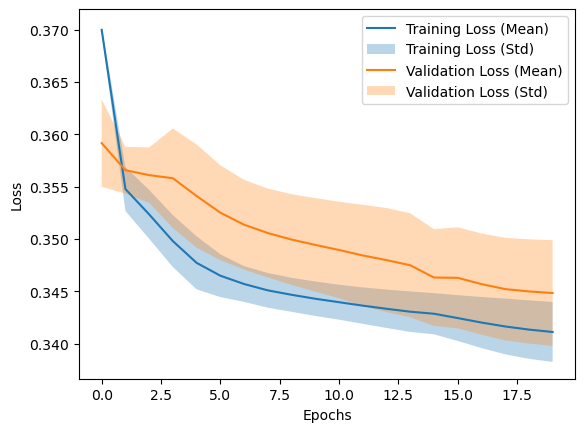

In [ ]:
plot_history(history_list_3)

In [ ]:
#f1 score mean
f1_scores_3 = []

for i, mlp in enumerate(trained_mlp_3):
    y_pred = np.round(mlp.predict(np.float32(input_data_3)[test_index_3]) > 0)
    f1 = f1_score(np.float32(output_data_3.to_numpy())[test_index_3] > 0, y_pred)
    f1_scores_3.append(f1)

f1_mean_3 = np.mean(f1_scores_3)

for i, f1 in enumerate(f1_scores_3):
    print(f"Fold {i+1}, F1 Score: {f1}")

print(f"\nMean F1 Score: {f1_mean_3}")

426/426 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
426/426 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
426/426 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Fold 1, F1 Score: 0.8567891830127595
Fold 2, F1 Score: 0.8588089092820955
Fold 3, F1 Score: 0.8478260869565217

Mean F1 Score: 0.8544747264171256


### Résultat de différente combinaison, à voir ce qu'on garde
#### 1. 0.8536443148
- LR : 0.001
- M : 0.9
- epoch : 10

Layers :
- 8, tanh
- 1, tanh

#### 2. 0.8567042042007113
- LR : 0.1
- M : 0.0
- epoch : 10

Layers :
- 5, tanh
- 3, tanh
- 1, tanh